# Data preparation

## Imports & data

In [1]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

athletes = pd.read_csv("../dataset/Olympic_Athlete_Bio.csv")
athlete_results = pd.read_csv("../dataset/Olympic_Athlete_Event_Results.csv")
countries = pd.read_csv("../dataset/Olympics_Country.csv")
games = pd.read_csv("../dataset/Olympics_Games.csv")

## Data merging

- Merge weight, height, born and sex

In [2]:
dataset = athlete_results.merge(athletes[['athlete_id','weight', 'height', 'born', 'sex']], on='athlete_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female


- Merge year

In [3]:
dataset = dataset.merge(games[['edition_id', 'year']], on='edition_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,1908
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,1908
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,1908
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,1908
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,2022
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,2022
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,2022
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,2022


## Conversions

- Convert height and weight to numeric value

In [4]:
dataset["pos"] = pd.to_numeric(dataset["pos"], errors="coerce")
dataset["height"] = pd.to_numeric(dataset["height"], errors="coerce")
dataset["weight"] = pd.to_numeric(dataset["weight"], errors="coerce")
dataset["born"] = pd.to_datetime(dataset["born"], errors="coerce")
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,NaN,na,False,NaN,NaN,1889-06-17,Male,1908
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,NaN,na,False,NaN,NaN,1886-01-14,Male,1908
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,NaN,na,False,NaN,NaN,1882-02-18,Male,1908
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,NaN,na,False,NaN,NaN,1883-12-23,Male,1908
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,NaN,na,False,NaN,NaN,1878-04-22,Male,1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16.0,na,False,NaN,NaN,1993-01-11,Female,2022
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17.0,na,False,76.0,175.0,2002-03-29,Female,2022
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18.0,na,False,78.0,170.0,1992-04-23,Female,2022
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19.0,na,False,NaN,175.0,1985-08-29,Female,2022


## Calculations

In [5]:
# Calculate the age
dataset['age'] = dataset['year'] - dataset['born'].dt.year

# Calculate bmi
dataset['bmi'] = pd.to_numeric(dataset['weight'] / ((dataset['height'] / 100) ** 2))

# Simplify Gold/Medal/Bronze to win or loss
dataset['podium'] = (dataset['medal'] != 'na').astype(int)
dataset


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year,age,bmi,podium
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,NaN,na,False,NaN,NaN,1889-06-17,Male,1908,19.0,NaN,0
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,NaN,na,False,NaN,NaN,1886-01-14,Male,1908,22.0,NaN,0
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,NaN,na,False,NaN,NaN,1882-02-18,Male,1908,26.0,NaN,0
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,NaN,na,False,NaN,NaN,1883-12-23,Male,1908,25.0,NaN,0
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,NaN,na,False,NaN,NaN,1878-04-22,Male,1908,30.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16.0,na,False,NaN,NaN,1993-01-11,Female,2022,29.0,NaN,0
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17.0,na,False,76.0,175.0,2002-03-29,Female,2022,20.0,24.816327,0
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18.0,na,False,78.0,170.0,1992-04-23,Female,2022,30.0,26.989619,0
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19.0,na,False,NaN,175.0,1985-08-29,Female,2022,37.0,NaN,0


## Remove columns

- Remove teamsports, keep only individual sports

In [6]:
dataset = dataset[dataset['isTeamSport'] == False]
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year,age,bmi,podium
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,NaN,na,False,NaN,NaN,1889-06-17,Male,1908,19.0,NaN,0
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,NaN,na,False,NaN,NaN,1886-01-14,Male,1908,22.0,NaN,0
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,NaN,na,False,NaN,NaN,1882-02-18,Male,1908,26.0,NaN,0
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,NaN,na,False,NaN,NaN,1883-12-23,Male,1908,25.0,NaN,0
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,NaN,na,False,NaN,NaN,1878-04-22,Male,1908,30.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16.0,na,False,NaN,NaN,1993-01-11,Female,2022,29.0,NaN,0
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17.0,na,False,76.0,175.0,2002-03-29,Female,2022,20.0,24.816327,0
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18.0,na,False,78.0,170.0,1992-04-23,Female,2022,30.0,26.989619,0
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19.0,na,False,NaN,175.0,1985-08-29,Female,2022,37.0,NaN,0


- Remove columns

In [7]:

dataset = dataset.drop(columns=['edition_id', 'result_id', 'athlete_id', 'isTeamSport', 'edition', 'country_noc', 'athlete', 'born'])
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
0,Athletics,"100 metres, Men",NaN,na,NaN,NaN,Male,1908,19.0,NaN,0
1,Athletics,"400 metres, Men",NaN,na,NaN,NaN,Male,1908,22.0,NaN,0
2,Athletics,"800 metres, Men",NaN,na,NaN,NaN,Male,1908,26.0,NaN,0
3,Athletics,"800 metres, Men",NaN,na,NaN,NaN,Male,1908,25.0,NaN,0
4,Athletics,"800 metres, Men",NaN,na,NaN,NaN,Male,1908,30.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
314902,Bobsleigh,"Monobob, Women",16.0,na,NaN,NaN,Female,2022,29.0,NaN,0
314903,Bobsleigh,"Monobob, Women",17.0,na,76.0,175.0,Female,2022,20.0,24.816327,0
314904,Bobsleigh,"Monobob, Women",18.0,na,78.0,170.0,Female,2022,30.0,26.989619,0
314905,Bobsleigh,"Monobob, Women",19.0,na,NaN,175.0,Female,2022,37.0,NaN,0


## Remove NaN's

In [8]:
dataset = dataset.dropna()
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,Athletics,"3,500 metres Race Walk, Men",3.0,Bronze,76.0,184.0,Male,1908,29.0,22.448015,1
70,Swimming,"400 metres Freestyle, Men",2.0,Silver,65.0,170.0,Male,1908,17.0,22.491349,1
75,Swimming,"1,500 metres Freestyle, Men",3.0,Bronze,65.0,170.0,Male,1908,17.0,22.491349,1
130,Tennis,"Singles, Covered Courts, Men",3.0,Bronze,84.0,188.0,Male,1912,29.0,23.766410,1
360,Artistic Swimming,"Solo, Women",18.0,na,58.0,165.0,Female,1988,19.0,21.303949,0
...,...,...,...,...,...,...,...,...,...,...,...
314898,Bobsleigh,"Monobob, Women",12.0,na,74.0,180.0,Female,2022,28.0,22.839506,0
314899,Bobsleigh,"Monobob, Women",13.0,na,75.0,169.0,Female,2022,32.0,26.259585,0
314900,Bobsleigh,"Monobob, Women",14.0,na,73.0,171.0,Female,2022,29.0,24.964946,0
314903,Bobsleigh,"Monobob, Women",17.0,na,76.0,175.0,Female,2022,20.0,24.816327,0


## Final dataset

In [9]:
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,Athletics,"3,500 metres Race Walk, Men",3.0,Bronze,76.0,184.0,Male,1908,29.0,22.448015,1
70,Swimming,"400 metres Freestyle, Men",2.0,Silver,65.0,170.0,Male,1908,17.0,22.491349,1
75,Swimming,"1,500 metres Freestyle, Men",3.0,Bronze,65.0,170.0,Male,1908,17.0,22.491349,1
130,Tennis,"Singles, Covered Courts, Men",3.0,Bronze,84.0,188.0,Male,1912,29.0,23.766410,1
360,Artistic Swimming,"Solo, Women",18.0,na,58.0,165.0,Female,1988,19.0,21.303949,0
...,...,...,...,...,...,...,...,...,...,...,...
314898,Bobsleigh,"Monobob, Women",12.0,na,74.0,180.0,Female,2022,28.0,22.839506,0
314899,Bobsleigh,"Monobob, Women",13.0,na,75.0,169.0,Female,2022,32.0,26.259585,0
314900,Bobsleigh,"Monobob, Women",14.0,na,73.0,171.0,Female,2022,29.0,24.964946,0
314903,Bobsleigh,"Monobob, Women",17.0,na,76.0,175.0,Female,2022,20.0,24.816327,0


## Save dataset to csv file

In [10]:
dataset.to_csv("../data-files/dataset.csv", index=False)

## Encoding

In [11]:
# Convert categorical variables to numerical
sex_encoder = LabelEncoder()
sport_encoder = LabelEncoder()
event_encoder = LabelEncoder()
medal_encoder = LabelEncoder()

dataset['sex'] = sex_encoder.fit_transform(dataset['sex'])
dataset['sport'] = sport_encoder.fit_transform(dataset['sport'])
dataset['event'] = event_encoder.fit_transform(dataset['event'])
dataset['medal'] = medal_encoder.fit_transform(dataset['medal'])

dataset

C:\Users\deboo\AppData\Local\Temp\ipykernel_24536\3754950746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sex'] = sex_encoder.fit_transform(dataset['sex'])
C:\Users\deboo\AppData\Local\Temp\ipykernel_24536\3754950746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sport'] = sport_encoder.fit_transform(dataset['sport'])
C:\Users\deboo\AppData\Local\Temp\ipykernel_24536\3754950746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,5,82,3.0,0,76.0,184.0,1,1908,29.0,22.448015,1
70,45,88,2.0,2,65.0,170.0,1,1908,17.0,22.491349,1
75,45,7,3.0,0,65.0,170.0,1,1908,17.0,22.491349,1
130,48,340,3.0,0,84.0,188.0,1,1912,29.0,23.766410,1
360,4,359,18.0,3,58.0,165.0,0,1988,19.0,21.303949,0
...,...,...,...,...,...,...,...,...,...,...,...
314898,8,284,12.0,3,74.0,180.0,0,2022,28.0,22.839506,0
314899,8,284,13.0,3,75.0,169.0,0,2022,32.0,26.259585,0
314900,8,284,14.0,3,73.0,171.0,0,2022,29.0,24.964946,0
314903,8,284,17.0,3,76.0,175.0,0,2022,20.0,24.816327,0


## Correlation

### Correlation entire dataset

In [12]:
dataset.corr(numeric_only=True)

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
sport,1.000000,-0.106829,-0.114440,0.017034,0.112972,0.060942,0.039893,0.100223,-0.138948,0.125210,-0.017766
event,-0.106829,1.000000,-0.059978,-0.042838,0.113950,-0.047372,0.075465,-0.004557,0.197481,0.199813,0.049466
pos,-0.114440,-0.059978,1.000000,0.354855,-0.109169,-0.047392,0.050561,0.089321,0.028669,-0.111983,-0.391048
medal,0.017034,-0.042838,0.354855,1.000000,-0.051628,-0.023684,-0.009739,0.087372,0.001878,-0.050593,-0.915179
weight,0.112972,0.113950,-0.109169,-0.051628,1.000000,0.746315,0.525910,-0.034523,0.138662,0.843092,0.057930
height,0.060942,-0.047372,-0.047392,-0.023684,0.746315,1.000000,0.536039,0.013791,0.061781,0.281351,0.026440
sex,0.039893,0.075465,0.050561,-0.009739,0.525910,0.536039,1.000000,-0.177432,0.135268,0.350036,0.013409
year,0.100223,-0.004557,0.089321,0.087372,-0.034523,0.013791,-0.177432,1.000000,0.123650,-0.066070,-0.094351
age,-0.138948,0.197481,0.028669,0.001878,0.138662,0.061781,0.135268,0.123650,1.000000,0.158272,-0.004242
bmi,0.125210,0.199813,-0.111983,-0.050593,0.843092,0.281351,0.350036,-0.066070,0.158272,1.000000,0.056822


### Correlation by sport

In [13]:
for sport in dataset['sport'].unique():
    sport_data = dataset[dataset['sport'] == sport]
    print(sport)
    print(sport_data.corr(numeric_only=True))
    print("\n")

5
        sport     event       pos     medal    weight    height       sex  \
sport     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
event     NaN  1.000000  0.197532  0.060224  0.235056  0.122969 -0.050327   
pos       NaN  0.197532  1.000000  0.322419 -0.280994 -0.280611  0.000304   
medal     NaN  0.060224  0.322419  1.000000 -0.096925 -0.105191 -0.009217   
weight    NaN  0.235056 -0.280994 -0.096925  1.000000  0.764777  0.346747   
height    NaN  0.122969 -0.280611 -0.105191  0.764777  1.000000  0.493954   
sex       NaN -0.050327  0.000304 -0.009217  0.346747  0.493954  1.000000   
year      NaN -0.032410  0.278406  0.133751 -0.163176 -0.137456 -0.295412   
age       NaN  0.080512  0.248306  0.086279 -0.039641 -0.086974  0.027284   
bmi       NaN  0.249111 -0.231680 -0.073286  0.919430  0.462166  0.193294   
podium    NaN -0.066573 -0.359056 -0.909727  0.107790  0.116294  0.009988   

            year       age       bmi    podium  
sport        NaN       N

## Graphs

### BMI distribution

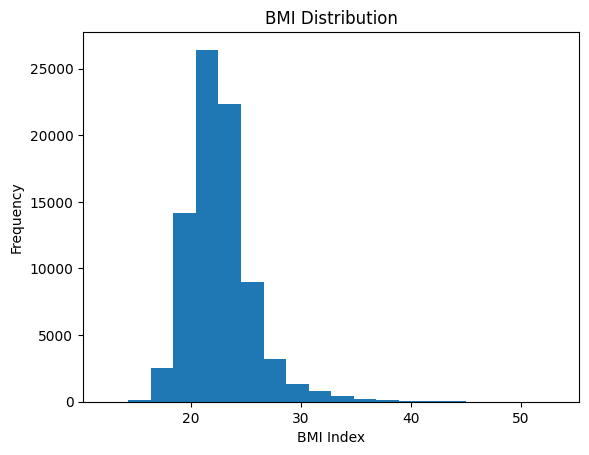

In [14]:
import math as math

# This code is in comments to more easily compare with the Z-indexed values.
# Uncomment to a get different view, where you only see 'nomal range' BMIs. This gives a better look at the distribution for the average athlete.

# minBmi = math.floor(dataset['bmi'].min())
# maxBmi = 35 # not math.ceil(dataset['bmi'].max()) as it goes up to 55 and is not relevant to display the thing we want to actually show ...
# bins = list(range(minBmi, maxBmi))

dataset['bmi'].plot(kind = 'hist', bins = 20)
# plt.xticks(bins)

plt.title('BMI Distribution')
plt.xlabel("BMI Index")
plt.show()

### BMI distribution (Z-Indexed)

Text(0.5, 0, 'BMI Index (Z-Indexed)')

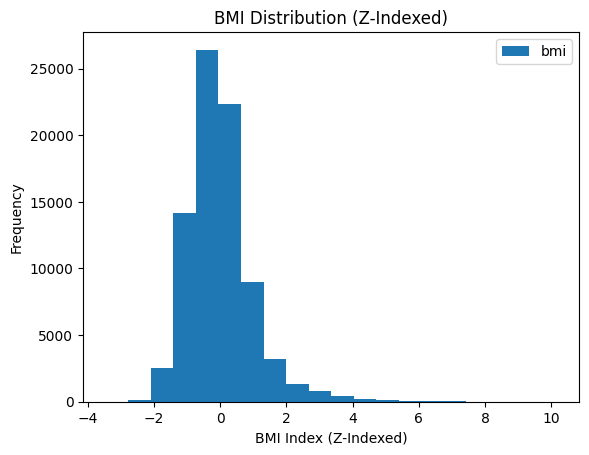

In [15]:
# pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler
import math as math

bmi_z = StandardScaler().fit_transform(dataset[['bmi']]);
bmi_z = pd.DataFrame(bmi_z, columns = ['bmi'])

bmi_z.plot(kind = 'hist', bins = 20)
plt.title('BMI Distribution (Z-Indexed)')
plt.xlabel("BMI Index (Z-Indexed)")

### Age vs BMI

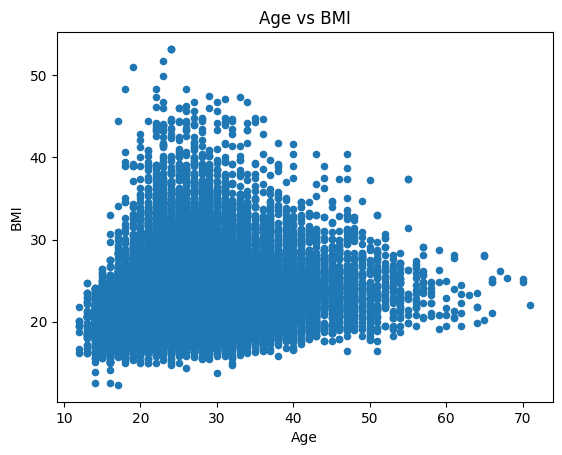

In [16]:

dataset.plot(x='age', y='bmi', kind='scatter')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()


### BMI vs Weight

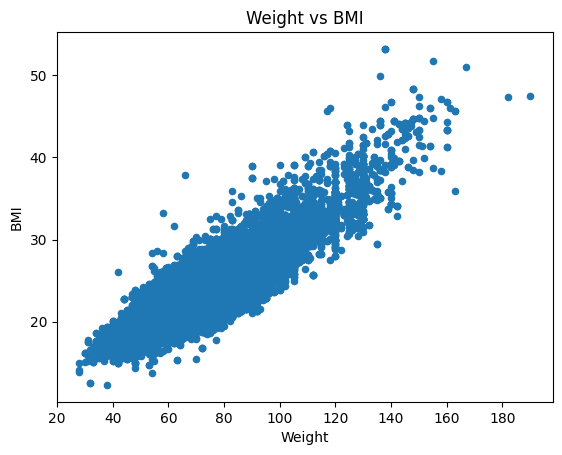

In [17]:
dataset.plot(x='weight', y='bmi', kind='scatter')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Weight vs BMI')
plt.show()

# Creating and training model

## KNN - Likelyhood of winning a medal (= being on podium) based on weight/height

In [18]:
dependant_predictors = dataset["podium"].values
independant_predictors = dataset[["weight", "height"]].values

# Scale the features as weight and height are not similar scales
scaler = StandardScaler()
independant_predictors = scaler.fit_transform(independant_predictors)

knn = KNeighborsClassifier(n_neighbors = 15)

x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors, random_state = 42, test_size= 0.3, stratify = dependant_predictors)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("Predictions: {}".format(y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("KNN Score: " + str(knn.score(x_test, y_test)))



Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.86
KNN Score: 0.8642468688200395


In [19]:
# LINEAR REGRESSION AS EXAMPLE/TEST
# from sklearn.model_selection import train_test_split
# from sklearn import LinearRegression

# dependant_predictors = ["medal"]
# independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi"] # would this really need weight/height as it is a function of BMI? Possibly height/weight still has some individual factors?

# dataset_dependant = dataset[dependant_predictors]
# dataset_independant = dataset[independant_predictors]

# x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors)
# model = LinearRegression().fit(x_train, y_train)


# RANDOM CLASSIFIER, WIP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is a pandas DataFrame
dependant_predictors = ["medal"]
independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi", "event"]

dataset_dependant = dataset[dependant_predictors]
dataset_independant = dataset[independant_predictors]

X_train, X_test, y_train, y_test = train_test_split(dataset_independant, dataset_dependant, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

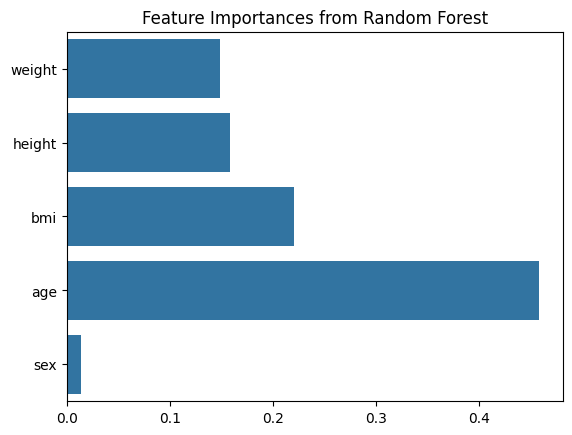

Total importance sum: 1.0000000000000002
Accuracy: 0.39469781238413054


array([132,  11, 234, ..., 227, 315,  32])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Select relevant features for correlation analysis
features = ['weight', 'height', 'bmi', 'age', 'sex']
X = dataset[features]
y = dataset['event']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

import seaborn as sns

# Plot feature importances
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances from Random Forest')
plt.show()

# Sum of feature importances should be 1
total_importance = sum(model.feature_importances_)
print(f'Total importance sum: {total_importance}')

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Use the sorted unique indices directly as the labels parameter
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
y_pred

In [21]:
# Function to predict sport based on input features
def predict_sport(weight, height, age, sex):
    # Convert input data to a DataFrame
    input_data = pd.DataFrame({
        'weight': [weight],
        'height': [height],
        'bmi': [weight / ((height / 100) ** 2)],
        'age': [age],
        'sex': [sex_encoder.transform([sex])[0]]
    })
    
    # Predict and decode the result
    predicted_encoded  = model.predict(input_data)
    
    # Map back to the actual sport name using the inverse_transform method
    predicted_sport = event_encoder.inverse_transform(predicted_encoded)

    # Return the first predicted sport as a string
    return predicted_sport[0]

# Example usage of the prediction function
predicted_sport = predict_sport(weight=75, height=20, age=20, sex='Male')
print(f'Predicted Sport: {predicted_sport}')

Predicted Sport: 50 metres Freestyle, Men


# Generate files

## Save predictions to csv file

In [22]:
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=['prediction'])
predictions_df.to_csv('../data-files/predictions.csv', index=False)
